In [1]:
import numpy as np
import pandas as pd
import os as os

In [2]:
os.chdir('/Users/raghuramkowdeed/Documents/afp/')

In [3]:
%pylab inline
exec(open("./run_model.py").read())
exec(open("./get_signal_names.py").read())
exec(open("./portfolio_optimizer.py").read())
exec(open("./non_linear_signal.py").read())

import datetime
from pylab import rcParams


Populating the interactive namespace from numpy and matplotlib


In [4]:
use_rank = True

sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/rank/500/rps_data/'
fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/rank/500/factor_exposure_data/'
fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/rank/500/fac_ret_file.csv'

if not use_rank:
    sig_dir = '/Users/raghuramkowdeed/Desktop/afp_data/norm/500/rps_data/'
    fac_data_dir='/Users/raghuramkowdeed/Desktop/afp_data/norm/500/factor_exposure_data/'
    fac_ret_file = '/Users/raghuramkowdeed/Desktop/afp_data/norm/500/fac_ret_file.csv'

In [5]:
sig_df = pd.DataFrame()
sig_files = os.listdir(sig_dir)
sig_files = np.sort(sig_files)

for sig_file in sig_files :
    if '.csv' not in sig_file :
        continue
    #print(sig_file)
    this_file = sig_dir + sig_file
    this_df = pd.read_csv(this_file, index_col = 'date')
    this_df.index = [ datetime.datetime.strptime(val, '%Y-%m-%d') for val in this_df.index]
    sig_df = sig_df.append(this_df)
data = sig_df.copy()

In [6]:
model_name = 'glmnet'
train_model_arg =  { 'alpha':0.5, 'fit_intercept':True, 'n_lambda':1000,'tol':1e-8 }
#model_name = 'linear_regression'
#train_model_arg = None


look_back = 12

In [7]:
begin_date = datetime.datetime.strptime('19900101', '%Y%m%d')
end_date = datetime.datetime.strptime('20170101', '%Y%m%d')

sig_df = sig_df[(sig_df.index>=begin_date) & (sig_df.index<end_date)]
sig_df = sig_df.fillna(sig_df.mean())

In [8]:
'res_ret' in sig_df.columns

True

In [9]:
#factor_names =  ['beta','mve', 'bm', 'roic', 'agr', 'mom12m', 'idiovol']
factor_names =  ['beta']
sig_names = get_signal_names()
ret_sr = sig_df['ret']
sig_df = sig_df[sig_names]
sig_df = sig_df.drop(factor_names, axis=1)

In [10]:
dim_vec = range(5,90,10)

In [11]:
model_sig_df,sig_names= get_glmnet_sig(sig_df, ret_sr, look_back = look_back,num_sig_vec = dim_vec, alpha = 0.5 )



inside
1991-01-31 00:00:00
1991-02-28 00:00:00
1991-03-28 00:00:00
1991-04-30 00:00:00
1991-05-31 00:00:00
1991-06-28 00:00:00
1991-07-31 00:00:00
1991-08-30 00:00:00
1991-09-30 00:00:00
1991-10-31 00:00:00
1991-11-29 00:00:00
1991-12-31 00:00:00
1992-01-31 00:00:00
1992-02-28 00:00:00
1992-03-31 00:00:00
1992-04-30 00:00:00
1992-05-29 00:00:00
1992-06-30 00:00:00
1992-07-31 00:00:00
1992-08-31 00:00:00
1992-09-30 00:00:00
1992-10-30 00:00:00
1992-11-30 00:00:00
1992-12-31 00:00:00
1993-01-29 00:00:00
1993-02-26 00:00:00
1993-03-31 00:00:00
1993-04-30 00:00:00
1993-05-28 00:00:00
1993-06-30 00:00:00
1993-07-30 00:00:00
1993-08-31 00:00:00
1993-09-30 00:00:00
1993-10-29 00:00:00
1993-11-30 00:00:00
1993-12-31 00:00:00
1994-01-31 00:00:00
1994-02-28 00:00:00
1994-03-31 00:00:00
1994-04-29 00:00:00
1994-05-31 00:00:00
1994-06-30 00:00:00
1994-07-29 00:00:00
1994-08-31 00:00:00
1994-09-30 00:00:00
1994-10-31 00:00:00
1994-11-30 00:00:00
1994-12-30 00:00:00
1995-01-31 00:00:00
1995-02-28 00

In [12]:
'res_ret' in sig_df.columns

False

In [13]:

pm = PortfolioOptimizer(fac_data_dir=fac_data_dir,
                        fac_ret_file = fac_ret_file,
                        fac_cov_hl = 12.0,
                        fac_names = None
                       )



--------


In [14]:
#new_sig_df = pd.DataFrame()

#for sig_name in sig_df.columns :
#    this_sig = sig_df[sig_name]
#    this_sig = pm.neu_signal(this_sig)
#    this_sig = this_sig.fillna(this_sig.mean())
#    new_sig_df[sig_name] = this_sig
#sig_df = new_sig_df

In [15]:
pnl_df = pd.DataFrame()
for i in range( model_sig_df.shape[1]):
    print(i)
    pnl_sr = pm.run_signal(sig_sr=model_sig_df.iloc[:,i],neu_sig=True)
    pnl_df[dim_vec[i]] = pnl_sr

pnl_df[0] = np.zeros(pnl_df.shape[0])

0
1
2
3
4
5
6
7
8


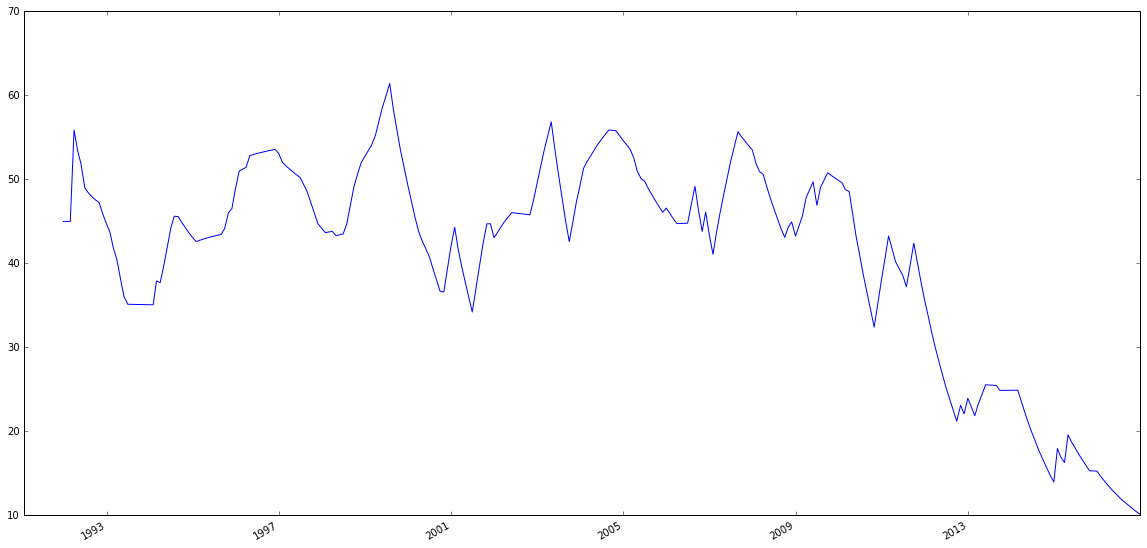

In [16]:
window = 12
#pnl_df_avg = ( pnl_df.rolling(window=window).mean()*sqrt(12) ) /( pnl_df.rolling(window=window).std() )
pnl_df_avg = ( pnl_df.rolling(window=window).mean()*sqrt(12) )    
max_ind = pnl_df_avg.idxmax(axis=1)
min_ind = pnl_df_avg.idxmin(axis=1)
max_ind_smt = max_ind.ewm(halflife=window).mean()

rcParams['figure.figsize'] = 20,10
max_ind_smt.plot()

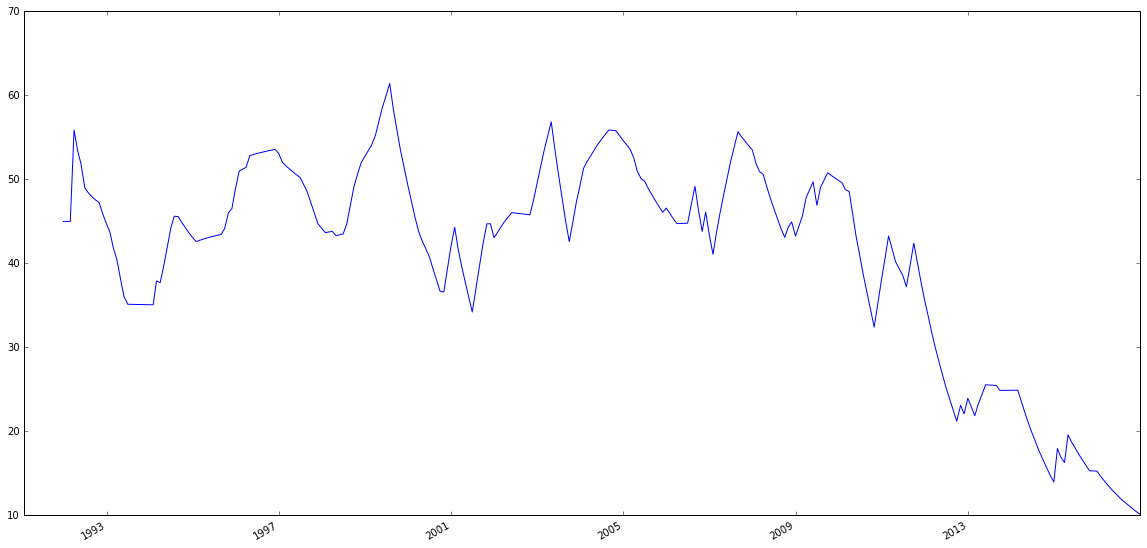

In [17]:
window = 12
#pnl_df_avg = ( pnl_df.rolling(window=window).mean()*sqrt(12) ) /( pnl_df.rolling(window=window).std() )
pnl_df_avg = ( pnl_df.rolling(window=window).mean()*sqrt(12) )    
max_ind = pnl_df_avg.idxmax(axis=1)
min_ind = pnl_df_avg.idxmin(axis=1)
max_ind_smt = max_ind.ewm(halflife=window).mean()

rcParams['figure.figsize'] = 20,10
max_ind_smt.plot()

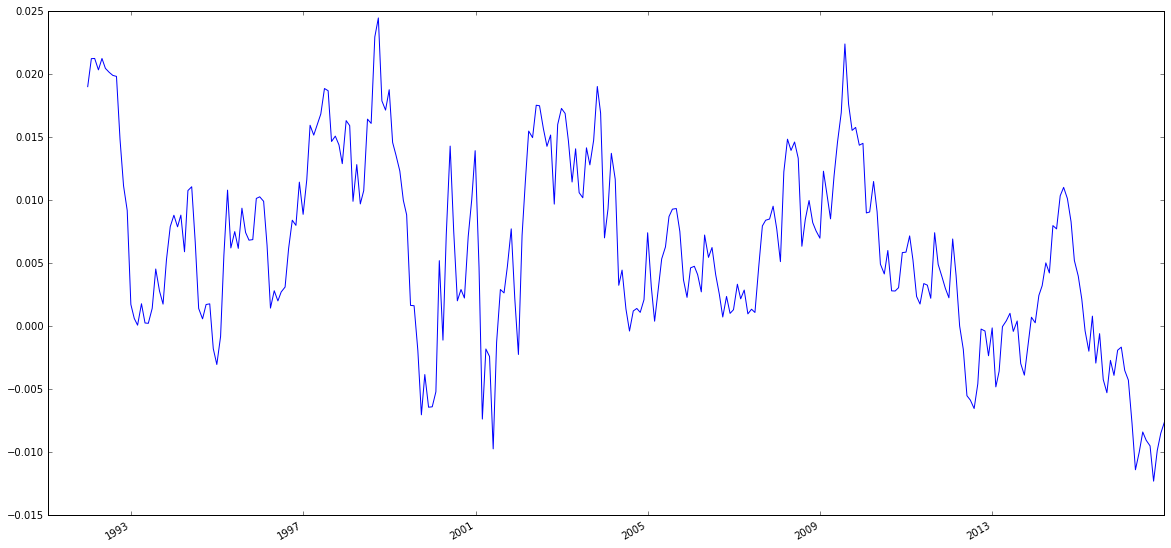

In [18]:
(pnl_df_avg.iloc[:,-2] - pnl_df_avg.iloc[:,0] ).plot()

In [19]:
pnl_df.mean(axis=0)*sqrt(12)/pnl_df.std(axis=0)

5     0.525797
15    0.776605
25    0.825652
35    0.854972
45    0.878482
55    0.886443
65    0.891872
75    0.902147
85    0.920011
0          NaN
dtype: float64

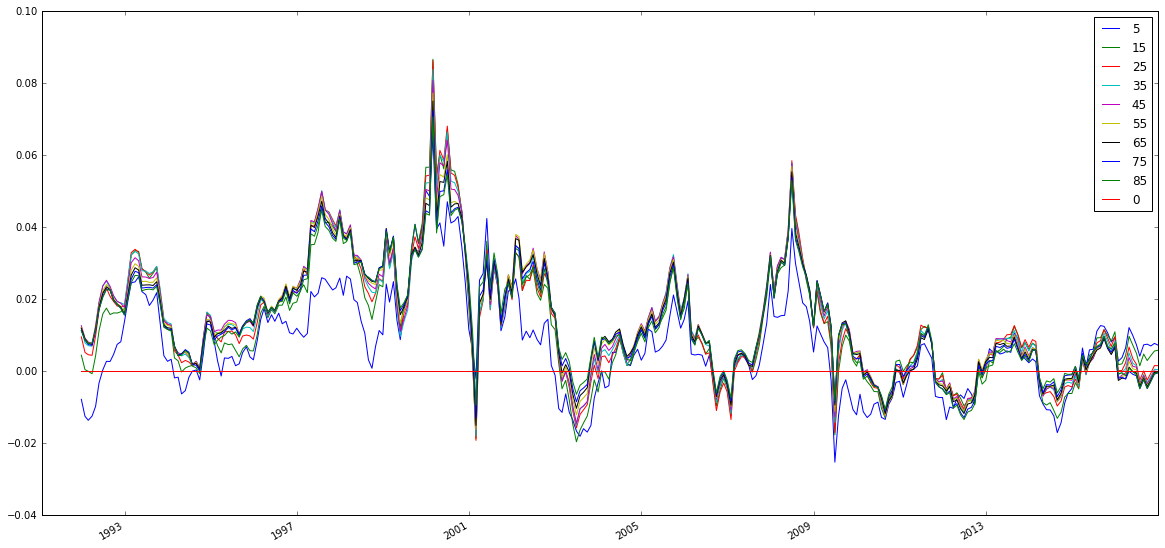

In [20]:
pnl_df_avg.plot()

In [21]:
pnl_df.mean(axis=0)*sqrt(12)/pnl_df.std()

5     0.525797
15    0.776605
25    0.825652
35    0.854972
45    0.878482
55    0.886443
65    0.891872
75    0.902147
85    0.920011
0          NaN
dtype: float64

In [28]:
dim_sr = pd.Series( dim_vec, index = pnl_df_avg.columns[:-1] )

In [47]:
import statsmodels.api as sm
lm_weights = []
lm_tstats = []
lm_pvalues = []

window = 24
pnl_df_avg = pnl_df.ewm(halflife=window).mean()
pnl_df_avg.dropna(inplace=True, axis=1)

for i in range(window,pnl_df_avg.shape[0]):
    lm = LinearRegression(fit_intercept=True)
    X = pd.DataFrame()
    X['x'] = dim_sr
    y = pnl_df_avg.iloc[i,:-1]
    #y = ( y - y.mean())/y.std()
    X = sm.add_constant(X, prepend=False)
    model = sm.OLS(y,X)
    results = model.fit()
    lm_weights.append( results.params[0] )

    lm_tstats.append( results.tvalues[0] )
    lm_pvalues.append(results.f_pvalue)

    
dates = pnl_df.index[(window/2):(-window/2)]
print(dates.shape)
print(pnl_df_avg.shape)

lm_weights = pd.Series(lm_weights, index = dates)
lm_tstats = pd.Series(lm_tstats, index = dates)
lm_pvalues = pd.Series(lm_pvalues, index = dates)

(288,)
(312, 10)


/Users/raghuramkowdeed/Applications/anaconda/lib/python3.5/site-packages/pandas/tseries/base.py:212: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  result = getitem(key)


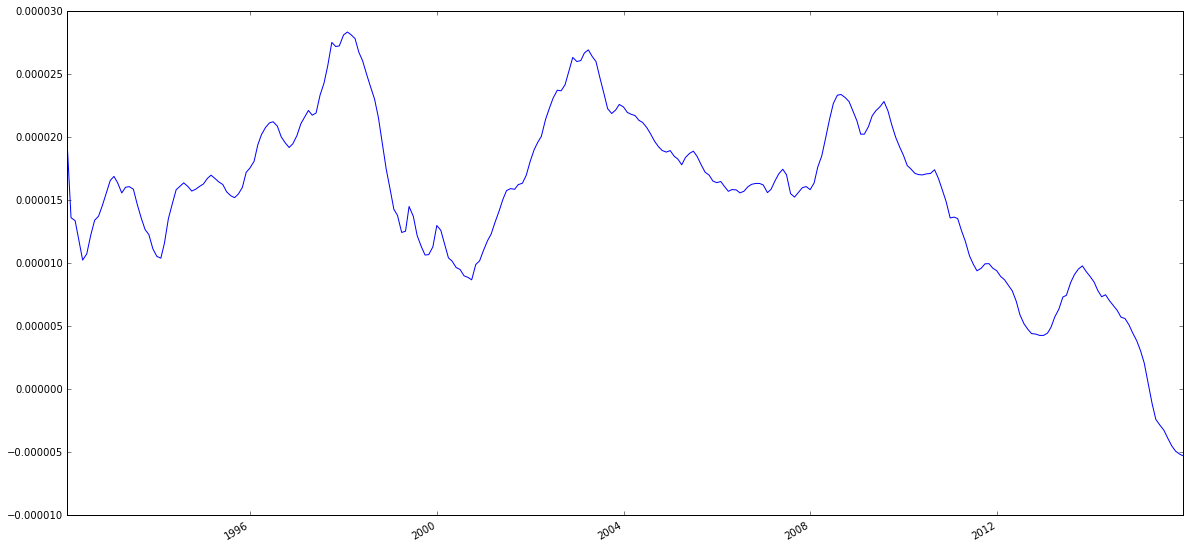

In [48]:
lm_weights.ewm(halflife=3).mean().plot()

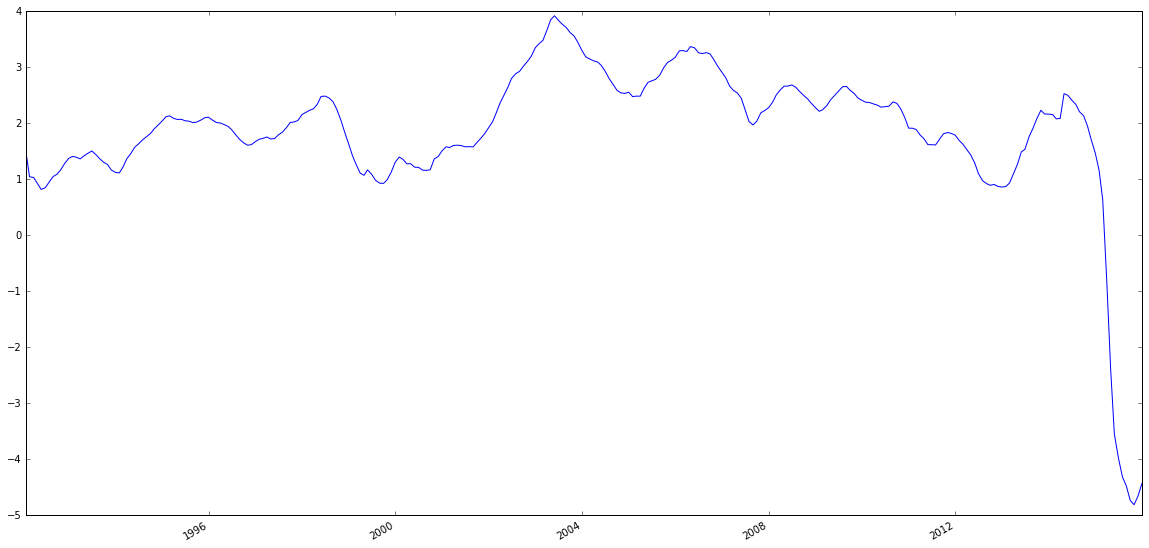

In [49]:
lm_tstats.ewm(halflife=3).mean().plot()

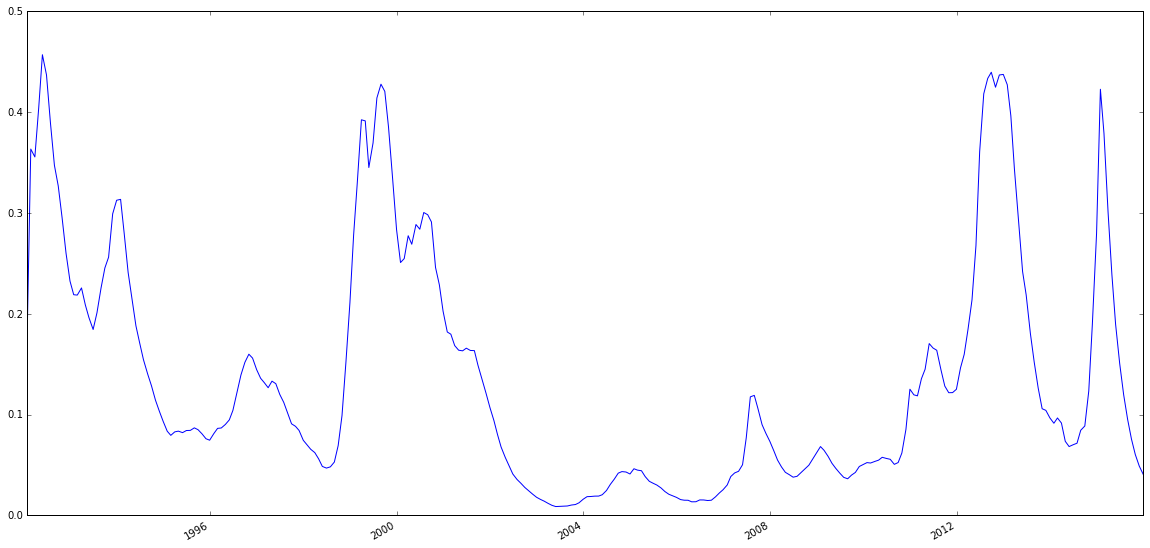

In [50]:
lm_pvalues.ewm(halflife=3).mean().plot()

0.0022684255387155489

In [42]:
obj

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     2016-12-30 00:00:00   R-squared:                       0.758
Model:                             OLS   Adj. R-squared:                  0.723
Method:                  Least Squares   F-statistic:                     21.88
Date:                 Sun, 25 Feb 2018   Prob (F-statistic):            0.00227
Time:                         09:41:18   Log-Likelihood:                 64.646
No. Observations:                    9   AIC:                            -125.3
Df Residuals:                        7   BIC:                            -124.9
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x          -1.258e-05   2.69e-06     -4.677      0.002     -1.89e-05 -6.22e-06
const          0.0017      0.000     12.536      0.000         0.001     0.002
==============================================================================
Omnibus:                        2.308   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.315   Jarque-Bera (JB):                1.123
Skew:                           0.844   Prob(JB):                        0.570
Kurtosis:                       2.619   Cond. No.                         104.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""